<a href="https://colab.research.google.com/github/singhsukhendra/myproject/blob/main/multiclass_Pneumonia_with_quaternion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.2.2

     |████████████████████████████████| 307kB 4.2MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
ERROR: tensorflow 2.4.0 has requirement keras-preprocessing~=1.1.2, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 65kB/s 
     |████████████████████████████████| 573kB 40.5MB/s 
     |████████████████████████████████| 3.3MB 23.9MB/s 
     |████████████████████████████████| 12.2MB 30.9MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: pandas 1.1.5 has requirement num

In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import cv2
import sys
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img,img_to_array

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/complexnn.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
from complexnn                               import *
from   keras.layers                          import *
from   keras.models                          import Model
import keras.backend                         as     K
import numpy                                 as     np

In [ ]:
files_covid = glob('/content/drive/MyDrive/Pneumonia3classdata/Covid/*')
files_normal = glob('/content/drive/MyDrive/Pneumonia3classdata/Normal/*')
files_pnenumonia = glob('/content/drive/MyDrive/Pneumonia3classdata/Pneumonia/*')

In [ ]:
len(files_covid),len(files_normal),len(files_pnenumonia)

(196, 196, 196)

In [ ]:
labels = [1] * len(files_covid)+ [0] * len(files_normal)+ [2] * len(files_pnenumonia)
files = files_covid + files_normal + files_pnenumonia

In [ ]:
len(files)

588

In [ ]:
train,test,train_labels,test_labels = train_test_split(files,labels,test_size=0.2)
train,val,train_labels,val_labels = train_test_split(train,train_labels,test_size=0.2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


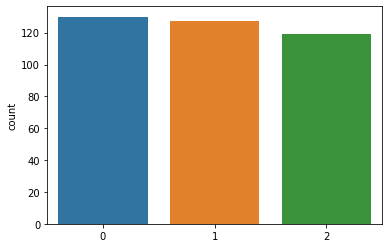

In [ ]:
sns.countplot(train_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


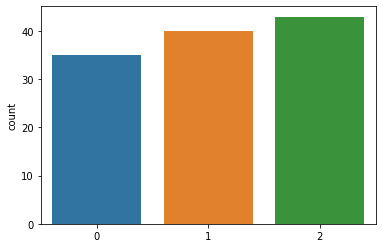

In [ ]:
sns.countplot(test_labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


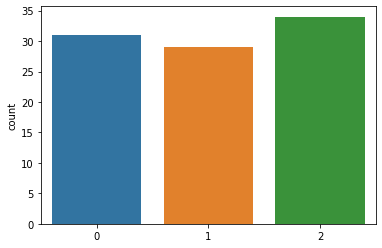

In [ ]:
sns.countplot(val_labels)

In [ ]:
def RgbToQuaternion(img):
    b,g,r = cv2.split(img)
    M=np.zeros((75,75,4))
    M[:,:,1]=r
    M[:,:,2]=g
    M[:,:,3]=b
    return(np.array(M))

In [ ]:
def load_train_data(file,label):
      img = cv2.imread(file)
      pixels = cv2.resize(img, (75,75), interpolation=cv2.INTER_CUBIC)
      pixels = RgbToQuaternion(pixels) /255.
      X_train.append(pixels)
      y_train.append(label)

def load_test_data(file,label):
      img = cv2.imread(file)
      pixels = cv2.resize(img, (75,75), interpolation=cv2.INTER_CUBIC)
      pixels = RgbToQuaternion(pixels) /255.
      x_test.append(pixels)
      y_test.append(label)

def load_val_data(file,label):
      img = cv2.imread(file)
      pixels = cv2.resize(img, (75,75), interpolation=cv2.INTER_CUBIC)
      pixels = RgbToQuaternion(pixels) /255.
      x_val.append(pixels)
      y_val.append(label)

In [ ]:
X_train = []
x_test = []
y_train = []
y_test = []
x_val = []
y_val = []

for i in tqdm(range(len(train))):
  load_train_data(train[i],train_labels[i])

for i in tqdm(range(len(test))):
  load_test_data(test[i],test_labels[i])

for i in tqdm(range(len(val))):
  load_val_data(val[i],val_labels[i])

100%|██████████| 94/94 [00:29<00:00,  3.16it/s]


In [ ]:
X_train = np.stack(X_train)
x_test = np.stack(x_test)
x_val = np.stack(x_val)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

In [ ]:
y_train.shape

(376, 3)

In [ ]:
def residual_block(mod_, f_in, f_out, strides_ = (1,1), use_shortcut_ = False):   
    shortcut_ = mod_
    
    k_ = (1,1)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_in, kernel_size=k_, strides=strides_, padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    mod_ = QuaternionConv2D(f_out, kernel_size=k_, strides=(1,1), padding = "same")(mod_)
    mod_ = BatchNormalization()(mod_)
    mod_ = ELU()(mod_)
    
    if use_shortcut_ == True or strides_ != (1,1):
        shortcut_ = QuaternionConv2D(f_out, kernel_size=k_, strides=strides_, padding = "same")(shortcut_)
        shortcut_ = BatchNormalization()(shortcut_)
        
    mod_ = Add()([shortcut_, mod_])
    mod_ = ReLU()(mod_)
    
    return mod_

In [ ]:
def model_build(in_):
    
    k_=(1,1)
    
    mod_ = QuaternionConv2D(16, kernel_size=k_, strides = (1,1), padding = "same")(in_)
    
    mod_ = BatchNormalization()(mod_)
    
    mod_ = ReLU()(mod_)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 16, 32, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 32, 64, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 64, 96, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = residual_block(mod_, 96, 128, use_shortcut_=True)
    
    mod_ = MaxPooling2D()(mod_)
    
    mod_ = GlobalAveragePooling2D()(mod_)
    
    mod_ = Dense(512, activation = "relu")(mod_)
    
    mod_ = Dropout(0.5)(mod_)
    
    mod_ = Dense(3, activation="sigmoid")(mod_)
    
    return mod_

In [ ]:
from keras import backend as K

def mcor(y_true, y_pred):
     #matthews_correlation
     y_pred_pos = K.round(K.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
 
 
     y_pos = K.round(K.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
 
 
     tp = K.sum(y_pos * y_pred_pos)
     tn = K.sum(y_neg * y_pred_neg)
 
 
     fp = K.sum(y_neg * y_pred_pos)
     fn = K.sum(y_pos * y_pred_neg)
 
 
     numerator = (tp * tn - fp * fn)
     denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
 
 
     return numerator / (denominator + K.epsilon())




def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
in_ = Input((75,75,4))
model_ = model_build(in_)

In [ ]:
model = Model(input = in_, output = model_)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 4)    0                                            
__________________________________________________________________________________________________
quaternion_conv2d_1 (Quaternion (None, 75, 75, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 75, 75, 64)   256         quaternion_conv2d_1[0][0]        
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 75, 75, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',mcor,precision,recall,f1])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
train_generator = datagen.flow(X_train,y_train, batch_size=64)
val_generator = datagen.flow(x_val,y_val, batch_size=64)

In [ ]:
# history = model.fit(X_train,y_train,     
#                    epochs=18,batch_size=128,       
#                    validation_data=(x_val,y_val))  

history = model.fit_generator(train_generator,     
                   epochs=60,      
                   validation_data=val_generator)  

Epoch 1/60
6/6 [==============================] - 78s 13s/step - loss: 0.9442 - acc: 0.6362 - mcor: 0.1694 - precision: 0.4858 - recall: 0.3893 - f1: 0.4148 - val_loss: 1.6841 - val_acc: 0.5355 - val_mcor: -0.0479 - val_precision: 0.3012 - val_recall: 0.2979 - val_f1: 0.2995
Epoch 2/60
6/6 [==============================] - 71s 12s/step - loss: 0.5474 - acc: 0.7378 - mcor: 0.4233 - precision: 0.6066 - recall: 0.6358 - f1: 0.6133 - val_loss: 1.9804 - val_acc: 0.5355 - val_mcor: -0.0481 - val_precision: 0.3009 - val_recall: 0.2979 - val_f1: 0.2994
Epoch 3/60
6/6 [==============================] - 71s 12s/step - loss: 0.5003 - acc: 0.7795 - mcor: 0.4951 - precision: 0.7075 - recall: 0.6021 - f1: 0.6430 - val_loss: 2.2380 - val_acc: 0.5390 - val_mcor: -0.0428 - val_precision: 0.3044 - val_recall: 0.2979 - val_f1: 0.3011
Epoch 4/60
6/6 [==============================] - 72s 12s/step - loss: 0.4448 - acc: 0.7978 - mcor: 0.5392 - precision: 0.7215 - recall: 0.6531 - f1: 0.6818 - val_loss: 2.1

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_mcor', 'val_precision', 'val_recall', 'val_f1', 'loss', 'acc', 'mcor', 'precision', 'recall', 'f1'])


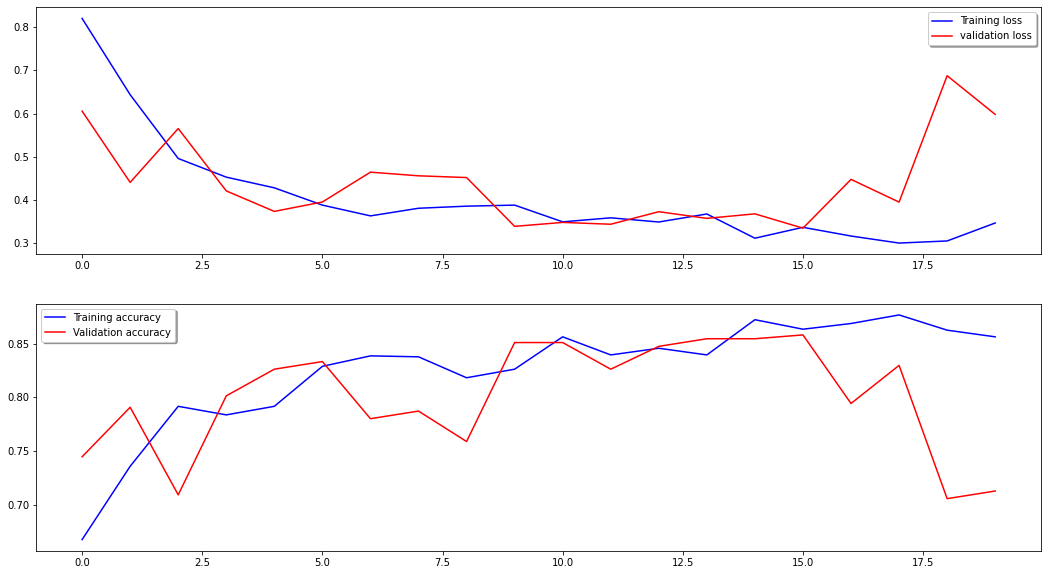

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
print('\nhistory dict:', history.history)



history dict: {'val_loss': [0.6056065331114099, 0.4404043472827749, 0.5652325045555195, 0.4206079105113415, 0.3731233338092236, 0.39492131928180124, 0.4641080784036758, 0.4556315243244171, 0.4516039972609662, 0.3384094815304939, 0.34758166239616717, 0.3433273865821514, 0.3724020820982913, 0.3569410487692407, 0.3674111740386232, 0.33424798288243884, 0.44734262595785423, 0.39468108276103403, 0.6877669945676276, 0.5980036525016136], 'val_acc': [0.7446808561365655, 0.7907801828485854, 0.70921986407422, 0.8014184350663043, 0.8262411470108844, 0.8333333540470043, 0.780141884976245, 0.7872340463577433, 0.7588652625997016, 0.8510638234463144, 0.8510638006190037, 0.8262411520836201, 0.8475177059782312, 0.854609951059869, 0.85460993203711, 0.8581560495051932, 0.7943263003166686, 0.8297872479925764, 0.7056738011380459, 0.7127659625195443], 'val_mcor': [0.4225986377989992, 0.5388327500921615, 0.317916750273806, 0.5397719981822562, 0.5975462718212858, 0.6132569947141282, 0.47775376286912474, 0.516

In [ ]:
test_labels = np.argmax(y_test,axis=1)

118/118 [==============================] - 11s 92ms/step


<Figure size 216x216 with 0 Axes>

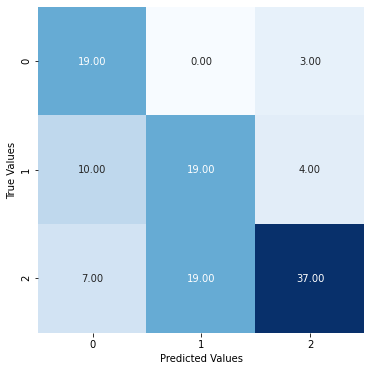

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(3, 3)) # Set Figure

y_pred = model.predict(x_test,verbose=1) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = []
for i in y_pred:
  if i[0]>i[1] and i[0]>i[2]:
    y.append(0)
  elif i[1]>i[0] and i[1]>i[2]:
    y.append(1)
  else:
    y.append(2)
mat = confusion_matrix(test_labels, y) # Confusion matrix

# Plot Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(mat.T, square=True, annot=True,fmt='0.2f', cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
acc = accuracy_score(test_labels,y)
f1_score = f1_score(test_labels,y,average='macro')
precision = precision_score(test_labels,y,average='macro')
recall = recall_score(test_labels,y,average='macro')

print(acc, f1_score, precision, recall)

0.635593220338983 0.627324155481822 0.6755651755651756 0.6228956228956228


In [ ]:
sensitivity=recall
sensitivity

0.6228956228956228

In [ ]:
fp = mat.sum(axis=0) - np.diag(mat)  
fn = mat.sum(axis=1) - np.diag(mat)
tp = np.diag(mat)
tn = mat.sum() - (fp + fn + tp)
fp,fn,tp,tn

(array([ 3, 14, 26]),
 array([17, 19,  7]),
 array([19, 19, 37]),
 array([79, 66, 48]))

In [ ]:
specificity =tn / (tn + fp)
specificity

array([0.96341463, 0.825     , 0.64864865])

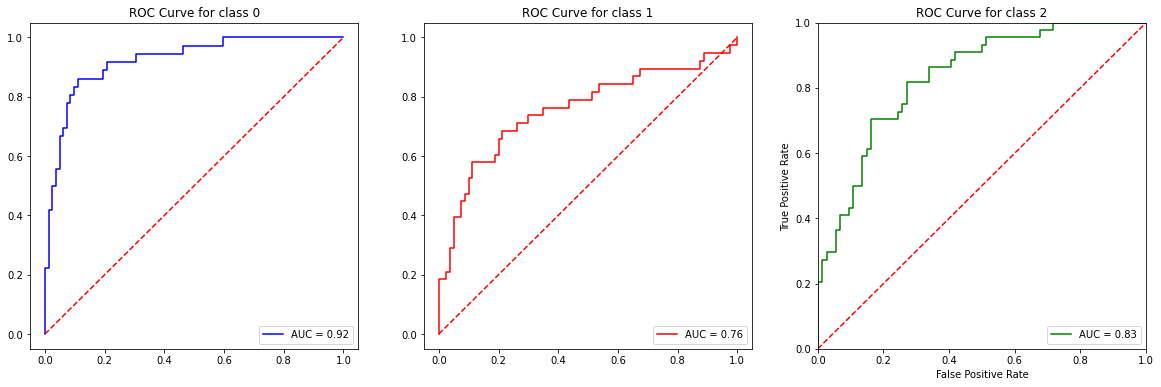

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr = [None] * 3
tpr = [None] * 3
threshold = [None] * 3
for i in range(3):
    fpr[i], tpr[i], threshold[i] = metrics.roc_curve(y_test[:,i],y_pred[:,i])
roc_auc0 = metrics.auc(fpr[0], tpr[0])
roc_auc1 = metrics.auc(fpr[1], tpr[1])
roc_auc2 = metrics.auc(fpr[2], tpr[2])

# method I: plt
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(20,6))
plt.title('Receiver Operating Characteristic')
ax[0].plot(fpr[0], tpr[0], 'b', label = 'AUC = %0.2f' % roc_auc0)
ax[1].plot(fpr[1], tpr[1], 'r', label = 'AUC = %0.2f' % roc_auc1)
ax[2].plot(fpr[2], tpr[2], 'g', label = 'AUC = %0.2f' % roc_auc2)

ax[0].title.set_text('ROC Curve for class 0')
ax[1].title.set_text('ROC Curve for class 1')
ax[2].title.set_text('ROC Curve for class 2')

ax[0].legend(loc = 'lower right')
ax[1].legend(loc = 'lower right')
ax[2].legend(loc = 'lower right')

ax[0].plot([0, 1], [0, 1],'r--')
ax[1].plot([0, 1], [0, 1],'r--')
ax[2].plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()